# Santander Customer Transaction Prediction


In [65]:
#Loading the library
library(DMwR)
library(rpart)
library(ggplot2)
library(corrgram)
library(ggpubr)
library(C50)
library(MASS)
library(dplyr)
library(Metrics)
library(randomForest)
library(ggthemes)
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.0-2



In [3]:
#loading the train and test data
train = read.csv("../input/customer-transaction-prediction/train.csv", header = T , stringsAsFactors = F)
test = read.csv("../input/customer-transaction-prediction/test.csv", header = T , stringsAsFactors = F)

In [4]:
#let's look at names of the 2 datasets
names(train)
names(test)

[1] "ID_code" "target"  "var_0"   "var_1"   "var_2"   "var_3"   "var_4"  
  [8] "var_5"   "var_6"   "var_7"   "var_8"   "var_9"   "var_10"  "var_11" 
 [15] "var_12"  "var_13"  "var_14"  "var_15"  "var_16"  "var_17"  "var_18" 
 [22] "var_19"  "var_20"  "var_21"  "var_22"  "var_23"  "var_24"  "var_25" 
 [29] "var_26"  "var_27"  "var_28"  "var_29"  "var_30"  "var_31"  "var_32" 
 [36] "var_33"  "var_34"  "var_35"  "var_36"  "var_37"  "var_38"  "var_39" 
 [43] "var_40"  "var_41"  "var_42"  "var_43"  "var_44"  "var_45"  "var_46" 
 [50] "var_47"  "var_48"  "var_49"  "var_50"  "var_51"  "var_52"  "var_53" 
 [57] "var_54"  "var_55"  "var_56"  "var_57"  "var_58"  "var_59"  "var_60" 
 [64] "var_61"  "var_62"  "var_63"  "var_64"  "var_65"  "var_66"  "var_67" 
 [71] "var_68"  "var_69"  "var_70"  "var_71"  "var_72"  "var_73"  "var_74" 
 [78] "var_75"  "var_76"  "var_77"  "var_78"  "var_79"  "var_80"  "var_81" 
 [85] "var_82"  "var_83"  "var_84"  "var_85"  "var_86"  "var_87"  "var_88" 
 [92] "var_89"  "var_90"  "var_91"  "var_92"  "var_93"  "var_94"  "var_95" 
 [99] "var_96"  "var_97"  "var_98"  "var_99"  "var_100" "var_101" "var_102"
[106] "var_103" "var_104" "var_105" "var_106" "var_107" "var_108" "var_109"
[113] "var_110" "var_111" "var_112" "var_113" "var_114" "var_115" "var_116"
[120] "var_117" "var_118" "var_119" "var_120" "var_121" "var_122" "var_123"
[127] "var_124" "var_125" "var_126" "var_127" "var_128" "var_129" "var_130"
[134] "var_131" "var_132" "var_133" "var_134" "var_135" "var_136" "var_137"
[141] "var_138" "var_139" "var_140" "var_141" "var_142" "var_143" "var_144"
[148] "var_145" "var_146" "var_147" "var_148" "var_149" "var_150" "var_151"
[155] "var_152" "var_153" "var_154" "var_155" "var_156" "var_157" "var_158"
[162] "var_159" "var_160" "var_161" "var_162" "var_163" "var_164" "var_165"
[169] "var_166" "var_167" "var_168" "var_169" "var_170" "var_171" "var_172"
[176] "var_173" "var_174" "var_175" "var_176" "var_177" "var_178" "var_179"
[183] "var_180" "var_181" "var_182" "var_183" "var_184" "var_185" "var_186"
[190] "var_187" "var_188" "var_189" "var_190" "var_191" "var_192" "var_193"
[197] "var_194" "var_195" "var_196" "var_197" "var_198" "var_199"

[1] "ID_code" "var_0"   "var_1"   "var_2"   "var_3"   "var_4"   "var_5"  
  [8] "var_6"   "var_7"   "var_8"   "var_9"   "var_10"  "var_11"  "var_12" 
 [15] "var_13"  "var_14"  "var_15"  "var_16"  "var_17"  "var_18"  "var_19" 
 [22] "var_20"  "var_21"  "var_22"  "var_23"  "var_24"  "var_25"  "var_26" 
 [29] "var_27"  "var_28"  "var_29"  "var_30"  "var_31"  "var_32"  "var_33" 
 [36] "var_34"  "var_35"  "var_36"  "var_37"  "var_38"  "var_39"  "var_40" 
 [43] "var_41"  "var_42"  "var_43"  "var_44"  "var_45"  "var_46"  "var_47" 
 [50] "var_48"  "var_49"  "var_50"  "var_51"  "var_52"  "var_53"  "var_54" 
 [57] "var_55"  "var_56"  "var_57"  "var_58"  "var_59"  "var_60"  "var_61" 
 [64] "var_62"  "var_63"  "var_64"  "var_65"  "var_66"  "var_67"  "var_68" 
 [71] "var_69"  "var_70"  "var_71"  "var_72"  "var_73"  "var_74"  "var_75" 
 [78] "var_76"  "var_77"  "var_78"  "var_79"  "var_80"  "var_81"  "var_82" 
 [85] "var_83"  "var_84"  "var_85"  "var_86"  "var_87"  "var_88"  "var_89" 
 [92] "var_90"  "var_91"  "var_92"  "var_93"  "var_94"  "var_95"  "var_96" 
 [99] "var_97"  "var_98"  "var_99"  "var_100" "var_101" "var_102" "var_103"
[106] "var_104" "var_105" "var_106" "var_107" "var_108" "var_109" "var_110"
[113] "var_111" "var_112" "var_113" "var_114" "var_115" "var_116" "var_117"
[120] "var_118" "var_119" "var_120" "var_121" "var_122" "var_123" "var_124"
[127] "var_125" "var_126" "var_127" "var_128" "var_129" "var_130" "var_131"
[134] "var_132" "var_133" "var_134" "var_135" "var_136" "var_137" "var_138"
[141] "var_139" "var_140" "var_141" "var_142" "var_143" "var_144" "var_145"
[148] "var_146" "var_147" "var_148" "var_149" "var_150" "var_151" "var_152"
[155] "var_153" "var_154" "var_155" "var_156" "var_157" "var_158" "var_159"
[162] "var_160" "var_161" "var_162" "var_163" "var_164" "var_165" "var_166"
[169] "var_167" "var_168" "var_169" "var_170" "var_171" "var_172" "var_173"
[176] "var_174" "var_175" "var_176" "var_177" "var_178" "var_179" "var_180"
[183] "var_181" "var_182" "var_183" "var_184" "var_185" "var_186" "var_187"
[190] "var_188" "var_189" "var_190" "var_191" "var_192" "var_193" "var_194"
[197] "var_195" "var_196" "var_197" "var_198" "var_199"

In [7]:
str(train)

'data.frame':	200000 obs. of  202 variables:
 $ ID_code: chr  "train_0" "train_1" "train_2" "train_3" ...
 $ target : int  0 0 0 0 0 0 0 0 0 0 ...
 $ var_0  : num  8.93 11.5 8.61 11.06 9.84 ...
 $ var_1  : num  -6.79 -4.15 -2.75 -2.15 -1.48 ...
 $ var_2  : num  11.91 13.86 12.08 8.95 12.87 ...
 $ var_3  : num  5.09 5.39 7.89 7.2 6.64 ...
 $ var_4  : num  11.5 12.4 10.6 12.6 12.3 ...
 $ var_5  : num  -9.28 7.04 -9.08 -1.84 2.45 ...
 $ var_6  : num  5.12 5.62 6.94 5.84 5.94 ...
 $ var_7  : num  18.6 16.5 14.6 14.9 19.3 ...
 $ var_8  : num  -4.92 3.15 -4.92 -5.86 6.27 ...
 $ var_9  : num  5.75 8.09 5.95 8.24 7.68 ...
 $ var_10 : num  2.925 -0.403 -0.325 2.306 -9.446 ...
 $ var_11 : num  3.18 8.06 -11.26 2.81 -12.14 ...
 $ var_12 : num  14 14 14.2 13.8 13.8 ...
 $ var_13 : num  0.575 8.414 7.312 11.97 7.889 ...
 $ var_14 : num  8.8 5.43 7.52 6.46 7.79 ...
 $ var_15 : num  14.6 13.7 14.6 14.8 15.1 ...
 $ var_16 : num  5.75 13.83 7.68 10.74 8.49 ...
 $ var_17 : num  -7.24 -15.58 -1.74 -0.43 

In [8]:
str(test)

'data.frame':	200000 obs. of  201 variables:
 $ ID_code: chr  "test_0" "test_1" "test_2" "test_3" ...
 $ var_0  : num  11.07 8.53 5.48 8.54 11.71 ...
 $ var_1  : num  7.78 1.254 -10.358 -1.322 -0.133 ...
 $ var_2  : num  13 11.3 10.1 12 14.1 ...
 $ var_3  : num  9.43 5.19 7.05 6.57 7.75 ...
 $ var_4  : num  11.43 9.2 10.26 8.85 9.1 ...
 $ var_5  : num  -2.38 -4.01 9.81 3.17 -8.58 ...
 $ var_6  : num  5.85 6.02 4.89 4.94 6.86 ...
 $ var_7  : num  18.3 18.6 20.3 20.6 10.6 ...
 $ var_8  : num  2.13 -4.41 1.52 3.38 2.99 ...
 $ var_9  : num  8.81 5.97 8.34 7.46 7.14 ...
 $ var_10 : num  -2.0248 -1.3809 -4.7057 0.0095 5.1025 ...
 $ var_11 : num  -4.355 -0.331 -3.042 -5.066 -3.283 ...
 $ var_12 : num  14 14.1 13.7 14.1 14.1 ...
 $ var_13 : num  0.346 2.567 3.818 13.501 8.967 ...
 $ var_14 : num  7.54 5.5 10.85 8.77 4.73 ...
 $ var_15 : num  14.5 14.2 14.2 14.7 14.6 ...
 $ var_16 : num  7.7 7.02 9.88 10.04 11.86 ...
 $ var_17 : num  -19.09 4.66 2.65 -15.35 3.15 ...
 $ var_18 : num  15.58 29.16

In [9]:
summary(train)

   ID_code              target           var_0             var_1        
 Length:200000      Min.   :0.0000   Min.   : 0.4084   Min.   :-15.043  
 Class :character   1st Qu.:0.0000   1st Qu.: 8.4538   1st Qu.: -4.740  
 Mode  :character   Median :0.0000   Median :10.5247   Median : -1.608  
                    Mean   :0.1005   Mean   :10.6799   Mean   : -1.628  
                    3rd Qu.:0.0000   3rd Qu.:12.7582   3rd Qu.:  1.359  
                    Max.   :1.0000   Max.   :20.3150   Max.   : 10.377  
     var_2            var_3             var_4            var_5         
 Min.   : 2.117   Min.   :-0.0402   Min.   : 5.075   Min.   :-32.5626  
 1st Qu.: 8.722   1st Qu.: 5.2541   1st Qu.: 9.883   1st Qu.:-11.2004  
 Median :10.580   Median : 6.8250   Median :11.108   Median : -4.8331  
 Mean   :10.715   Mean   : 6.7965   Mean   :11.078   Mean   : -5.0653  
 3rd Qu.:12.517   3rd Qu.: 8.3241   3rd Qu.:12.261   3rd Qu.:  0.9248  
 Max.   :19.353   Max.   :13.1883   Max.   :16.671   Max.

In [10]:
summary(test)

   ID_code              var_0             var_1             var_2       
 Length:200000      Min.   : 0.1887   Min.   :-15.043   Min.   : 2.355  
 Class :character   1st Qu.: 8.4430   1st Qu.: -4.700   1st Qu.: 8.736  
 Mode  :character   Median :10.5138   Median : -1.591   Median :10.561  
                    Mean   :10.6587   Mean   : -1.624   Mean   :10.707  
                    3rd Qu.:12.7396   3rd Qu.:  1.343   3rd Qu.:12.495  
                    Max.   :22.3234   Max.   :  9.385   Max.   :18.714  
     var_3             var_4            var_5              var_6      
 Min.   :-0.0224   Min.   : 5.484   Min.   :-27.7670   Min.   :2.216  
 1st Qu.: 5.2305   1st Qu.: 9.891   1st Qu.:-11.2014   1st Qu.:4.773  
 Median : 6.8224   Median :11.100   Median : -4.8341   Median :5.392  
 Mean   : 6.7882   Mean   :11.076   Mean   : -5.0506   Mean   :5.415  
 3rd Qu.: 8.3276   3rd Qu.:12.253   3rd Qu.:  0.9426   3rd Qu.:6.006  
 Max.   :13.1420   Max.   :16.037   Max.   : 17.2537   Max.   :

In [11]:
train$target= as.factor(train$target)

In [12]:
str(train)

'data.frame':	200000 obs. of  202 variables:
 $ ID_code: chr  "train_0" "train_1" "train_2" "train_3" ...
 $ target : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ var_0  : num  8.93 11.5 8.61 11.06 9.84 ...
 $ var_1  : num  -6.79 -4.15 -2.75 -2.15 -1.48 ...
 $ var_2  : num  11.91 13.86 12.08 8.95 12.87 ...
 $ var_3  : num  5.09 5.39 7.89 7.2 6.64 ...
 $ var_4  : num  11.5 12.4 10.6 12.6 12.3 ...
 $ var_5  : num  -9.28 7.04 -9.08 -1.84 2.45 ...
 $ var_6  : num  5.12 5.62 6.94 5.84 5.94 ...
 $ var_7  : num  18.6 16.5 14.6 14.9 19.3 ...
 $ var_8  : num  -4.92 3.15 -4.92 -5.86 6.27 ...
 $ var_9  : num  5.75 8.09 5.95 8.24 7.68 ...
 $ var_10 : num  2.925 -0.403 -0.325 2.306 -9.446 ...
 $ var_11 : num  3.18 8.06 -11.26 2.81 -12.14 ...
 $ var_12 : num  14 14 14.2 13.8 13.8 ...
 $ var_13 : num  0.575 8.414 7.312 11.97 7.889 ...
 $ var_14 : num  8.8 5.43 7.52 6.46 7.79 ...
 $ var_15 : num  14.6 13.7 14.6 14.8 15.1 ...
 $ var_16 : num  5.75 13.83 7.68 10.74 8.49 ...
 $ var_17 : num  -7

In [13]:
#lets check the count of target classes
require(gridExtra)
table(train$target)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine





     0      1 
179902  20098 

In [14]:
#percentage count of target classes
table(train$target)/length(train$target)*100


     0      1 
89.951 10.049 

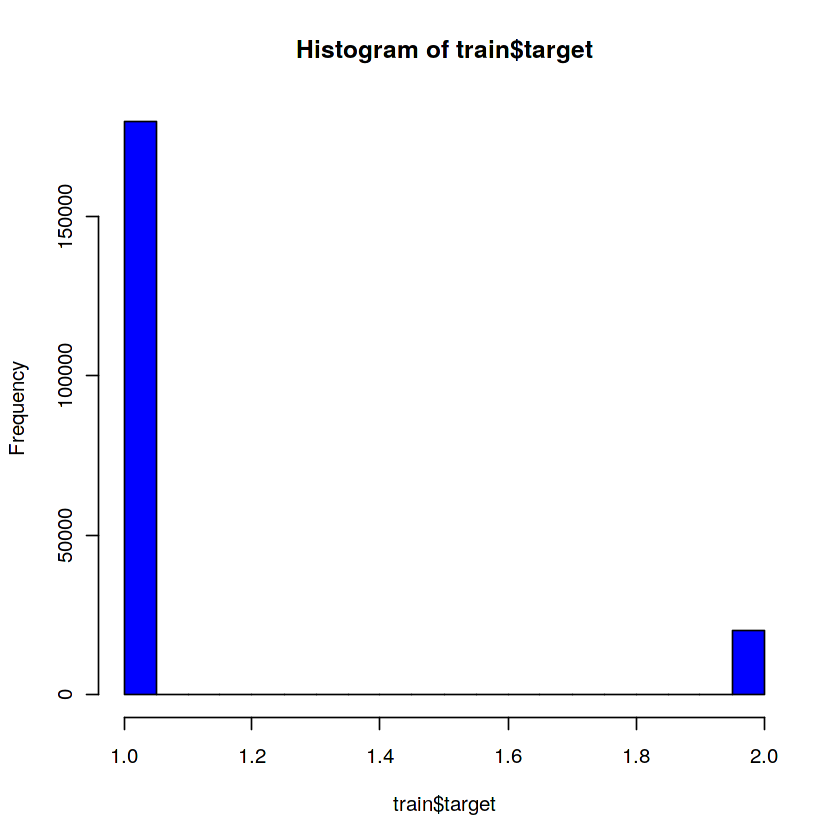

In [18]:
#histogram of train data
train$target= as.numeric(train$target)
hist(train$target , col = "blue")

In [22]:
#distribution of mean values per row and column in train and test dataset
#Applying the function to find mean values per row in train and test data.
train_mean = apply(train[,-c(1,2)],MARGIN=1,FUN=mean)
test_mean = apply(test[,-c(1)],MARGIN=1,FUN=mean)

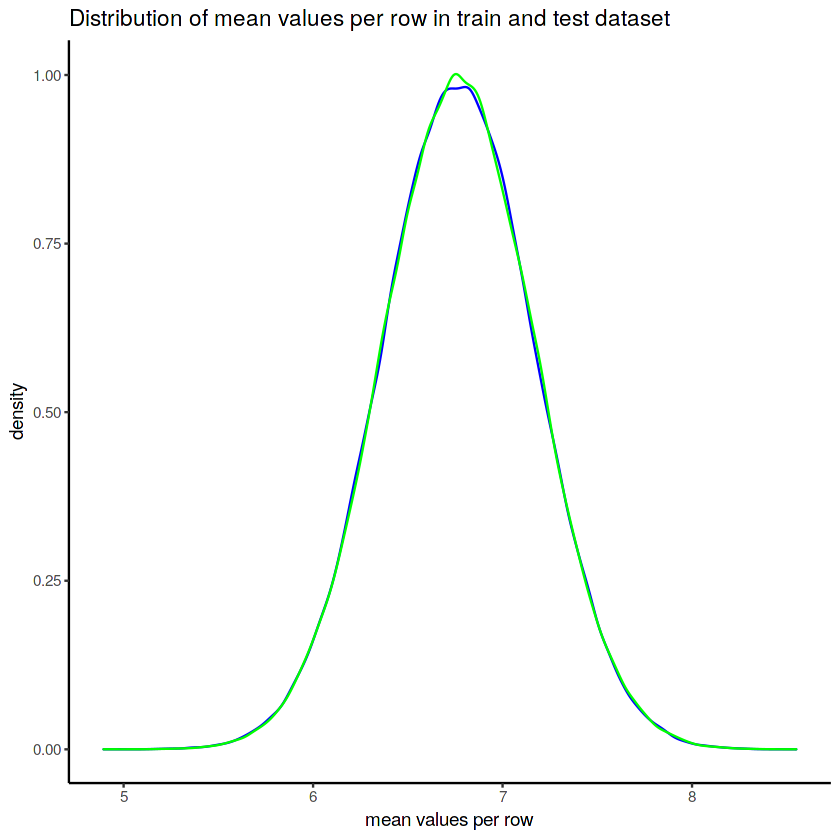

In [23]:
ggplot()+
  #Distribution of mean values per row in train data
  geom_density(data=train[,-c(1,2)],aes(x=train_mean),kernel='gaussian',show.legend=TRUE,color='blue')+theme_classic()+
  #Distribution of mean values per row in test data
  geom_density(data=test[,-c(1)],aes(x=test_mean),kernel='gaussian',show.legend=TRUE,color='green')+
  labs(x='mean values per row',title="Distribution of mean values per row in train and test dataset")

In [25]:
train_mean = apply(train[,-c(1,2)],MARGIN=2,FUN=mean)
test_mean = apply(test[,-c(1)],MARGIN=2,FUN=mean)

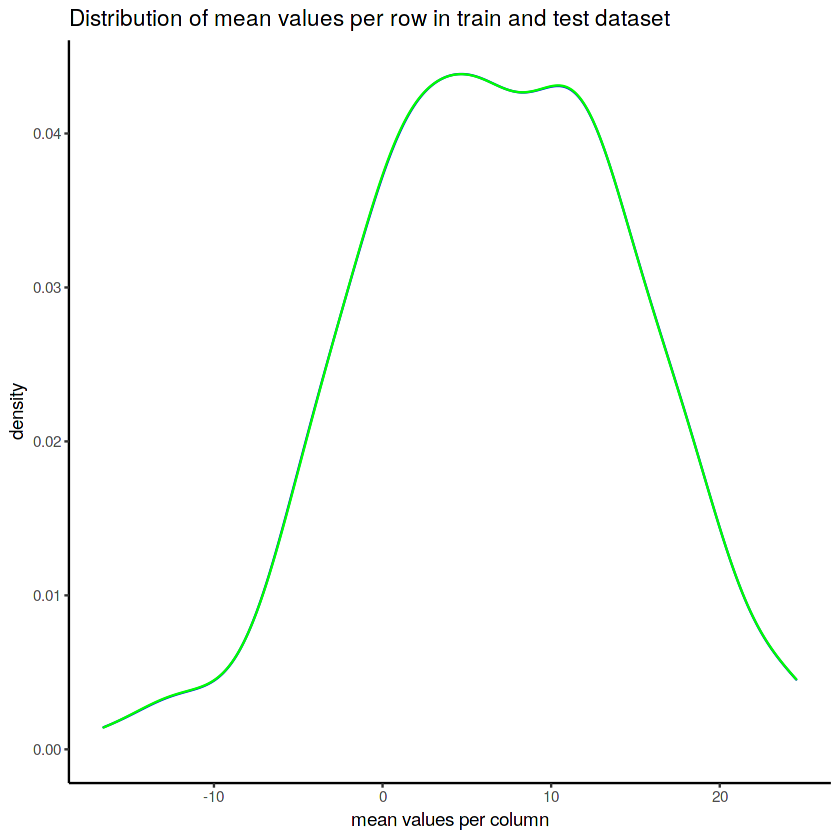

In [26]:
ggplot()+
  #Distribution of mean values per column in train data
  geom_density(aes(x=train_mean),kernel='gaussian',show.legend=TRUE,color='blue')+theme_classic()+
  #Distribution of mean values per column in test data
  geom_density(aes(x=test_mean),kernel='gaussian',show.legend=TRUE,color='green')+
  labs(x='mean values per column',title="Distribution of mean values per row in train and test dataset")

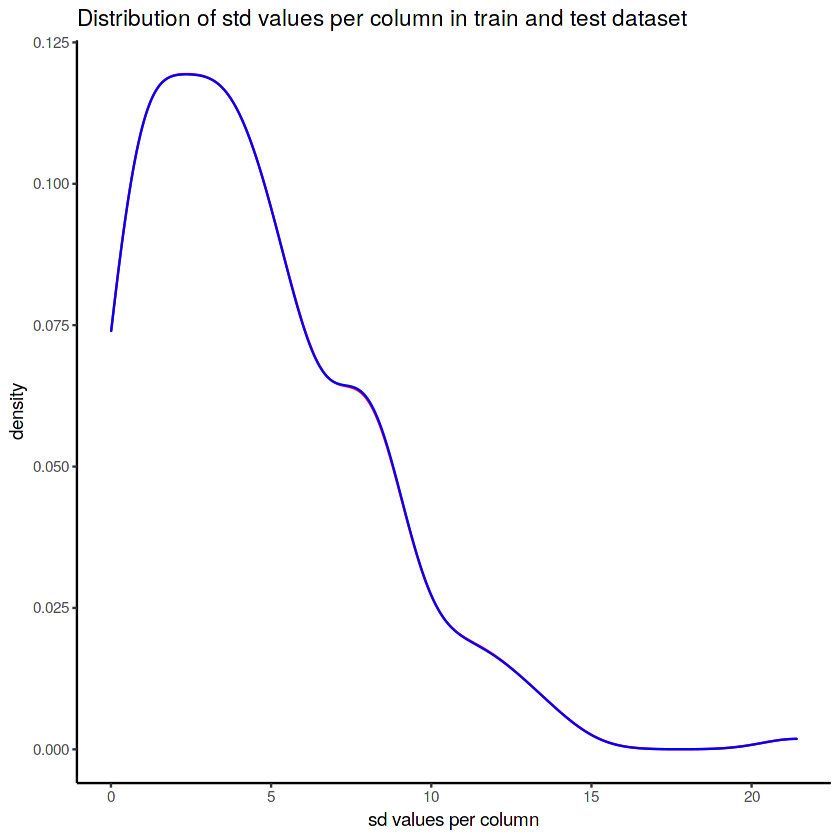

In [28]:
train_sd = apply(train[,-c(1,2)],MARGIN=2,FUN=sd)
test_sd = apply(test[,-c(1)],MARGIN=2,FUN=sd)
ggplot()+
  #Distribution of sd values per column in train data
  geom_density(aes(x=train_sd),kernel='gaussian',show.legend=TRUE,color='red')+theme_classic()+
  #Distribution of sd values per column in test data
  geom_density(aes(x=test_sd),kernel='gaussian',show.legend=TRUE,color='blue')+
  labs(x='sd values per column',title="Distribution of std values per column in train and test dataset")

In [32]:
sum(is.na(train))

[1] 0

In [33]:
sum(is.na(test))

[1] 0

In [34]:
#removing variable "ID_Code" from train and test dataset
train = train[, -1, drop = FALSE]
test = test[, -1, drop = FALSE]

In [35]:
train[] = lapply(train[], as.numeric)

In [36]:
#Correlation in train data
#convert factor to int
train$target = as.numeric(train$target)
train_correlations = cor(train[,c(1:201)])
train_correlations

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.0000000000,5.238959e-02,5.034263e-02,0.0558703478,1.105522e-02,1.091464e-02,3.097863e-02,6.673085e-02,-0.0030248096,1.958427e-02,⋯,5.597341e-02,4.711368e-02,-4.285840e-02,-1.770937e-02,-2.283766e-02,2.828454e-02,2.360780e-02,-3.530274e-02,-0.0529996414,2.543448e-02
var_0,0.0523895918,1.000000e+00,-5.436992e-04,0.0065728338,3.800761e-03,1.325809e-03,3.046247e-03,6.982549e-03,0.0024290136,4.962431e-03,⋯,2.752206e-03,2.058475e-04,-5.372594e-03,1.616389e-03,-1.513828e-03,2.072891e-03,4.385592e-03,-7.527427e-04,-0.0057756970,3.849928e-03
var_1,0.0503426288,-5.436992e-04,1.000000e+00,0.0039804942,1.022949e-05,3.034899e-04,-9.017325e-04,3.257729e-03,0.0015111807,4.098488e-03,⋯,6.627445e-03,3.620972e-03,-2.603830e-03,1.153440e-03,-2.557459e-03,-7.852730e-04,-3.770025e-04,-4.156961e-03,-0.0048609560,2.287120e-03
var_2,0.0558703478,6.572834e-03,3.980494e-03,1.0000000000,1.000860e-03,7.228454e-04,1.568905e-03,8.825211e-04,-0.0009906046,2.648399e-03,⋯,1.965815e-04,1.284570e-03,-3.399595e-03,5.490486e-04,2.104071e-03,-1.069707e-03,3.951844e-03,1.078188e-03,-0.0008770672,3.854832e-03
var_3,0.0110552237,3.800761e-03,1.022949e-05,0.0010008601,1.000000e+00,-3.216973e-04,3.253349e-03,-7.743892e-04,0.0024999460,3.553395e-03,⋯,1.508267e-04,2.445381e-03,-1.529992e-03,-1.698896e-03,-1.053725e-03,1.206004e-03,-2.799964e-03,1.163899e-03,-0.0016509079,5.055321e-04
var_4,0.0109146385,1.325809e-03,3.034899e-04,0.0007228454,-3.216973e-04,1.000000e+00,-1.368157e-03,4.882529e-05,0.0045488857,1.193622e-03,⋯,1.513793e-03,4.356636e-03,3.347023e-03,8.134391e-04,-6.801224e-05,3.706012e-03,5.130522e-04,-4.602317e-05,-0.0018206709,-7.860876e-04
var_5,0.0309786274,3.046247e-03,-9.017325e-04,0.0015689051,3.253349e-03,-1.368157e-03,1.000000e+00,2.587780e-03,-0.0009949490,1.469427e-04,⋯,1.465541e-03,-2.225330e-05,1.115520e-03,-2.237489e-03,-2.542891e-03,-1.273660e-03,2.879974e-03,-5.347813e-04,-0.0009532011,2.767143e-03
var_6,0.0667308456,6.982549e-03,3.257729e-03,0.0008825211,-7.743892e-04,4.882529e-05,2.587780e-03,1.000000e+00,-0.0025477455,-1.187995e-03,⋯,7.213321e-04,5.604217e-03,-2.562816e-03,2.463706e-03,-1.140816e-03,1.243768e-03,5.378485e-03,-3.565184e-03,-0.0030246739,6.096300e-03
var_7,-0.0030248096,2.429014e-03,1.511181e-03,-0.0009906046,2.499946e-03,4.548886e-03,-9.949490e-04,-2.547746e-03,1.0000000000,8.143795e-04,⋯,-3.371778e-04,-3.956720e-03,1.732927e-03,3.218592e-03,-2.699386e-04,1.853817e-03,1.045220e-03,3.466034e-03,0.0006500617,-1.456753e-03
var_8,0.0195842709,4.962431e-03,4.098488e-03,0.0026483989,3.553395e-03,1.193622e-03,1.469427e-04,-1.187995e-03,0.0008143795,1.000000e+00,⋯,2.922788e-03,-1.151228e-03,-4.286941e-04,1.413581e-03,1.312999e-03,1.395911e-03,-3.241934e-03,-4.582679e-03,0.0029499735,8.536717e-04


In [37]:
#Correlation in test data
test_correlations = cor(test[,c(1:200)])
test_correlations

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000e+00,0.0042335145,2.624971e-03,0.0008471226,-4.251666e-03,0.0022741497,1.930051e-03,-4.654152e-03,-3.669056e-03,1.426791e-03,⋯,0.0026624615,0.0011506928,1.101855e-03,0.0027557330,-3.508987e-03,0.0014455782,-0.0007540715,-3.818271e-04,-4.068108e-03,0.0012479309
var_1,4.233514e-03,1.0000000000,2.911984e-03,-0.0021477898,7.162270e-04,0.0013929934,3.566747e-03,3.023687e-03,7.781143e-04,-2.642757e-03,⋯,0.0020323094,0.0034771557,-3.454402e-03,0.0003453238,1.260690e-04,0.0013390613,-0.0016274512,-2.838935e-03,-3.023831e-03,0.0018611361
var_2,2.624971e-03,0.0029119843,1.000000e+00,-0.0058815391,3.657207e-03,0.0002834116,-1.140732e-03,-2.726431e-04,1.230733e-03,4.115227e-05,⋯,-0.0017653504,0.0011436002,-5.495600e-03,0.0020270556,-2.395976e-03,0.0013329947,-0.0023995578,-2.726007e-03,-1.536963e-03,0.0002287068
var_3,8.471226e-04,-0.0021477898,-5.881539e-03,1.0000000000,-9.588142e-04,0.0016444395,-3.074175e-03,1.945318e-03,-1.442812e-03,-1.290507e-03,⋯,-0.0016300264,0.0021191094,1.269334e-03,-0.0061363644,2.885169e-04,0.0016005536,0.0031773538,2.780267e-03,-2.624764e-03,-0.0030342623
var_4,-4.251666e-03,0.0007162270,3.657207e-03,-0.0009588142,1.000000e+00,0.0048215215,-3.284120e-03,-1.668071e-04,3.138067e-03,9.274888e-05,⋯,-0.0031058791,0.0024728021,-7.341585e-04,-0.0007541481,-4.266055e-04,0.0030458212,-0.0013172914,4.247895e-04,-2.145896e-03,0.0004006501
var_5,2.274150e-03,0.0013929934,2.834116e-04,0.0016444395,4.821522e-03,1.0000000000,-3.554599e-03,2.836662e-03,1.954658e-03,2.249102e-03,⋯,-0.0006597377,0.0026618019,-2.652047e-03,-0.0012088233,9.974891e-04,0.0026762003,-0.0024451867,-3.664875e-03,-4.626368e-03,0.0016380913
var_6,1.930051e-03,0.0035667474,-1.140732e-03,-0.0030741754,-3.284120e-03,-0.0035545993,1.000000e+00,1.845252e-03,2.114786e-03,-1.948044e-03,⋯,0.0025207091,0.0008675911,-2.711951e-03,-0.0044936516,-2.502347e-03,0.0009797075,-0.0016016531,-3.378162e-03,9.427481e-04,0.0020227426
var_7,-4.654152e-03,0.0030236867,-2.726431e-04,0.0019453183,-1.668071e-04,0.0028366620,1.845252e-03,1.000000e+00,-6.499807e-04,2.838648e-03,⋯,-0.0005086568,0.0038281022,1.510923e-03,0.0016164341,-2.228916e-03,0.0048119564,0.0016451791,1.451452e-03,-8.098279e-04,0.0006235573
var_8,-3.669056e-03,0.0007781143,1.230733e-03,-0.0014428120,3.138067e-03,0.0019546584,2.114786e-03,-6.499807e-04,1.000000e+00,-2.117846e-03,⋯,-0.0002159480,0.0002437535,-2.102828e-05,-0.0033015465,9.763977e-05,-0.0032409598,0.0027649653,-2.954463e-03,-1.544332e-03,-0.0003698523
var_9,1.426791e-03,-0.0026427568,4.115227e-05,-0.0012905069,9.274888e-05,0.0022491024,-1.948044e-03,2.838648e-03,-2.117846e-03,1.000000e+00,⋯,0.0005531020,0.0009944073,-1.879431e-03,0.0009000436,1.122292e-03,-0.0028538594,0.0013254285,2.240899e-03,-2.259159e-03,0.0015144162


In [39]:
########variable imortance############
#variable importance is used to see top features in the dataset
#lets build a simple model to find important features
#Split the training data using simple random sampling
df_index = sample(1:nrow(train),0.75*nrow(train))
#train data
train_data = train[df_index,]
#validation data
valid_data = train[-df_index,]
#dimension of train and validation data
dim(train_data)
dim(valid_data)

[1] 150000    201

[1] 50000   201

In [45]:
#Training the Random forest classifier
set.seed(2732)
#convert to int to factor
# train_data$target = as.factor(train_data$target)
#setting the mtry
mtry<-floor(sqrt(200))
#setting the tunegrid
tuneGrid<-expand.grid(.mtry=mtry)


In [50]:
#fitting the random forest
rf = randomForest(target~.,train_data,mtry=mtry,ntree=10,importance=TRUE)

In [51]:
#Variable importance
Imp_feats = importance(rf,type=2)
Imp_feats

ERROR: Error in UseMethod("importance"): no applicable method for 'importance' applied to an object of class "function"


In [54]:
set.seed(689)

train.index = sample(1:nrow(train),0.8*nrow(train))
#train data
train.data = train[train.index,]
#validation data
valid.data = train[-train.index,]

In [55]:
#dimension of train data
dim(train.data)
#dimension of validation data
dim(valid.data)

[1] 160000    201

[1] 40000   201

In [56]:
table(train.data$target)



     1      2 
143850  16150 

In [57]:
table(valid.data$target)


    1     2 
36052  3948 

In [59]:
#Training dataset
X_t = as.matrix(train.data[,-c(1,2)])
y_t = as.matrix(train.data$target)
#validation dataset
X_v = as.matrix(valid.data[,-c(1,2)])
y_v = as.matrix(valid.data$target)
#test dataset
test = as.matrix(test[,-c(1)])

In [64]:
install.packages("glmnet", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
set.seed(667) # to reproduce results
lr_model  = glmnet(X_t,y_t, family = "binomial")
summary(lr_model)

           Length Class     Mode     
a0            61  -none-    numeric  
beta       12139  dgCMatrix S4       
df            61  -none-    numeric  
dim            2  -none-    numeric  
lambda        61  -none-    numeric  
dev.ratio     61  -none-    numeric  
nulldev        1  -none-    numeric  
npasses        1  -none-    numeric  
jerr           1  -none-    numeric  
offset         1  -none-    logical  
classnames     2  -none-    character
call           4  -none-    call     
nobs           1  -none-    numeric  

In [67]:
#Cross validation prediction
set.seed(8909)
cv_lr = cv.glmnet(X_t,y_t,family = "binomial", type.measure = "class")
cv_lr

In [68]:
#Minimum lambda
cv_lr$lambda.min
#plot the auc score vs log(lambda)
plot(cv_lr)

ERROR: Error in eval(expr, envir, enclos): object 'cv_lr' not found


In [69]:
#Model performance on validation dataset
set.seed(5363)
cv_predict.lr = predict(cv_lr,X_v,s = "lambda.min", type = "class")
cv_predict.lr

ERROR: Error in predict(cv_lr, X_v, s = "lambda.min", type = "class"): object 'cv_lr' not found


In [70]:
#Confusion matrix
set.seed(689)
#actual target variable
target = valid.data$target
#convert to factor
target = as.factor(target)
#predicted target variable
#convert to factor
cv_predict.lr = as.factor(cv_predict.lr)
confusionMatrix(data=cv_predict.lr,reference=target)


ERROR: Error in is.factor(x): object 'cv_predict.lr' not found


In [71]:
#ROC_AUC score and curve
set.seed(892)
cv_predict.lr = as.numeric(cv_predict.lr)
roc(data=valid.data[,-c(1,2)],response=target,predictor=cv_predict.lr,auc=TRUE,plot=TRUE)


ERROR: Error in eval(expr, envir, enclos): object 'cv_predict.lr' not found
